In [1]:

# Set up notebook
%pprint
%matplotlib inline
import sys
import os.path as osp, os as os

executable_path = sys.executable
scripts_folder = osp.join(osp.dirname(executable_path), 'Scripts'); assert osp.exists(scripts_folder)
py_folder = osp.abspath(osp.join(os.pardir, 'py')); assert osp.exists(py_folder), "Create the py folder"
ffmpeg_folder = r'C:\ffmpeg\bin'; assert osp.exists(ffmpeg_folder)
shared_folder = osp.abspath(osp.join(os.pardir, 'share')); assert osp.exists(shared_folder)

if (scripts_folder not in sys.path): sys.path.insert(1, scripts_folder)
if (py_folder not in sys.path): sys.path.insert(1, py_folder)
if (ffmpeg_folder not in sys.path): sys.path.insert(1, ffmpeg_folder)
if shared_folder not in sys.path: sys.path.insert(1, shared_folder)

from notebook_utils import NotebookUtilities
nu = NotebookUtilities(
    data_folder_path=osp.abspath(osp.join(os.pardir, 'data')),
    saves_folder_path=osp.abspath(osp.join(os.pardir, 'saves'))
)
nu.delete_ipynb_checkpoint_folders()

# Import needed libraries
import re
import pandas as pd
import pyperclip
import ipywidgets as widgets
from IPython.display import display
import inspect

Pretty printing has been turned OFF


In [24]:

def get_combined_image(img, caption, font, verbose=False):

    # Load the original image
    original_image = Image.open(img).convert("RGBA")
    if verbose:
        print(original_image.size)
    
    # Create a TextClip with a specific background color
    txt_clip = TextClip(font, caption, font_size=48, color='white', size=original_image.size, bg_color='black', vertical_align='bottom')
    
    # Create a new image with the text overlay
    txt_image = txt_clip.get_frame(0)  # Get the text frame as an image
    txt_image = Image.fromarray(txt_image)  # Convert to PIL Image
    
    # Convert txt_image to RGBA to match original_image
    txt_image = txt_image.convert("RGBA")
    if verbose:
        print(txt_image.size)
    
    # Create a transparent alpha channel for the text image
    ImagingCore_obj = txt_image.getdata()
    new_image_data = []
    
    # Loop through the data (RGBA values)
    for item in ImagingCore_obj:
        
        # Whenever we find a black pixel
        if item[0] == 0 and item[1] == 0 and item[2] == 0:
            
            # Replace it with a transparent RGBA value
            new_image_data.append((255, 255, 255, 0))
        
        # And the other colors will be unchanged
        else:
            new_image_data.append(item)  # Assumed fully opaque
        
    txt_image.putdata(new_image_data)

    # Combine the original image with the text image
    combined_image = Image.alpha_composite(original_image, txt_image)
    if verbose:
        display(combined_image)
    
    return combined_image

In [ ]:

import tempfile
def get_modified_image_paths(images, captions, font):
    modified_images = []
    
    # Create a temporary directory
    with tempfile.TemporaryDirectory() as temp_dir:
        
        # Loop through the data (RGBA values)
        for img, caption in tqdm(zip(images, captions), total=min(len(images), len(captions)), desc='Create the Modified Images'):
            
            # Combine the original image with the text image
            combined_image = get_combined_image(img, caption, font, verbose=False)
            # display(combined_image)
            
            # Save the combined image to the temporary directory
            modified_image_path = osp.join(temp_dir, f"modified_{osp.basename(img)}")
            combined_image.save(modified_image_path, format="PNG")
            
            # Append the path of the modified image to the list
            modified_images.append(modified_image_path)
    
    return modified_images

In [2]:

import glob

pattern = osp.join('C:\\', '**', '*.otf')
opentype_fonts = [font for font in glob.glob(pattern, recursive=True) if '$Recycle.Bin' not in font]
images = [osp.join(nu.data_folder, 'png', f"image{i:02}.png") for i in range(13)]
all_captions = [
    "Here is a woman who is always tired,\nShe lives a life where too much is required.\nWith dreams on her shoulders, heavy as stone,\nIn the hustle and bustle, she often feels alone.\nDays filled with duties, from dawn until night,\nChasing her shadows, she fights the good fight.\nYet in her heart glimmers a flickering flame,\nA whisper of hope, calling out her name.\nShe yearns for a moment, a pause in the race,\nTo breathe in the stillness, to find her own space.\nFor within her resilience lies beauty untold,\nA spirit unbroken, a heart made of gold.",
    "Here is a woman who is always tired,",
    "She lives a life where too much is required.",
    "With dreams on her shoulders, heavy as stone,",
    "In the hustle and bustle, she often feels alone.",
    "Days filled with duties, from dawn until night,",
    "Chasing her shadows, she fights the good fight.",
    "Yet in her heart glimmers a flickering flame,",
    "A whisper of hope, calling out her name.",
    "She yearns for a moment, a pause in the race,",
    "To breathe in the stillness, to find her own space.",
    "For within her resilience lies beauty untold,",
    "A spirit unbroken, a heart made of gold.",
]
soundtracks = [osp.abspath(f) for f in glob.glob('../data/mp3/*.mp3')]
filename_regex = re.compile("[^A-Za-z0-9]+")

In [16]:

from moviepy import ImageClip, TextClip, CompositeVideoClip, concatenate_videoclips, AudioFileClip
import random
from PIL import Image
import proglog
from tqdm import tqdm

# Create the file prefix
font = random.choice(opentype_fonts)
soundtrack = random.choice(soundtracks)
file_name_prefix = filename_regex.sub("_", osp.basename(soundtrack).split('.')[0]).strip('_') + '_' + filename_regex.sub("_", osp.basename(font).split('.')[0])
print(file_name_prefix)

Weightless_by_Marconi_Union_QTPeignoir


C:\texlive\2022\texmf-dist\fonts\opentype\public\qualitype\QTPeignoir.otf


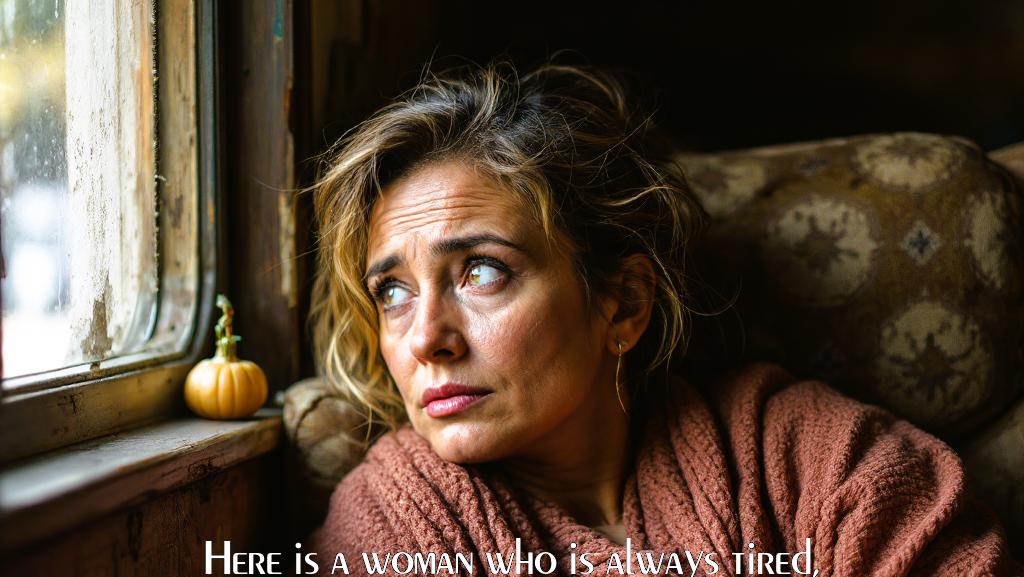

In [32]:

print(font)
images = [osp.join(nu.data_folder, 'png', 'incremental', f"image{i:02}.png") for i in range(1, 13)]
captions = all_captions[1:]
display(get_combined_image(images[0], captions[0], font, verbose=False))

In [33]:

# Save the combined images to a temporary location
modified_images = get_modified_image_paths(images, captions, font)

Create the Modified Images: 100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:07<00:00,  1.67it/s]


In [37]:

# Get the duration of the audio in seconds
audio = AudioFileClip(soundtrack)
audio_duration = audio.duration

# Calculate the number of clips
num_clips = len(modified_images)

# Calculate the duration for each ImageClip
clip_duration = audio_duration / num_clips

# Now convert the modified images into video clips
clips = []
for modified_img in tqdm(modified_images, total=num_clips, desc='Convert the Images'):
    
    # Create an image clip
    img_clip = ImageClip(modified_img, duration=clip_duration)  # Display each modified image for the calculated duration
    # display(Image.fromarray(img_clip.get_frame(0)))
    
    # Don't combine image and caption as a CompositeVideoClip
    clips.append(img_clip)

Convert the Images: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 23.20it/s]


In [ ]:

# Concatenate all video clips
final_video = concatenate_videoclips(clips, method="compose")

# Add the soundtrack
final_video = final_video.with_audio(audio)
final_video.fps = 24

# Write the final movie to a file (MP4)
file_name = file_name_prefix + '.mp4'
video_path = osp.join(nu.saves_folder, 'mp4', file_name)
os.makedirs(name=osp.dirname(video_path), exist_ok=True)
final_video.write_videofile(video_path)  # , logger=proglog.TqdmProgressBarLogger(notebook=True)

MoviePy - Building video C:\Users\daveb\OneDrive\Documents\GitHub\notebooks\saves\mp4\Weightless_by_Marconi_Union_QTPeignoir.mp4.
MoviePy - Writing audio in Weightless_by_Marconi_Union_QTPeignoirTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
MoviePy - Writing video C:\Users\daveb\OneDrive\Documents\GitHub\notebooks\saves\mp4\Weightless_by_Marconi_Union_QTPeignoir.mp4



frame_index:  40%|███████████████████████████████▋                                                | 17883/45072 [08:31<13:46, 32.90it/s, now=None]